In [1]:
import scipy.io #initializes libraries

import time
import math

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
mat = scipy.io.loadmat('./datasets/Oxford_Battery_Degradation_Dataset_1.mat') #reads dataset

In [38]:
# Initialize the list to store separate DataFrames
all_data_for_key = []
# Create an empty DataFrame
df = pd.DataFrame()

# Iterate through data cells (excluding special keys)
for key in mat.keys():
    if not key.startswith('_'):
        value = mat[key]  # Access the value for each key

        # Handle data based on type
        if isinstance(value, dict):  # Check if it's a dictionary
            pass
        elif isinstance(value, np.ndarray):  # Check if it's an array
            if value.ndim == 1:
                df[key] = pd.Series(value.squeeze())  # Add 1D array as a column (Series)
            elif value.ndim == 2:
                # Reshape 2D array into 1D array before creating DataFrame
                flattened_array = value.flatten()
                df[key] = pd.DataFrame(flattened_array, columns=[key])  # Create DataFrame with single column
            else:
                # Handle higher-dimensional data (consider 3D arrays as an example)
                if len(value.shape) == 3:
                    dataframes = []
                    for i in range(value.shape[0]):
                        dataframes.append(pd.DataFrame(value[i, :, :]))  # Reshape and create separate DataFrames
                    # Store the list of DataFrames (consider naming them appropriately)
                    all_data_for_key = dataframes
                else:
                    # Handle other higher-dimensional cases if necessary (logic based on your data structure)
                    pass

# After iterating through all data
# Save the main DataFrame (df) to CSV if applicable
df.to_csv('data.csv', index=False)
print("Main DataFrame saved to data.csv")

# Handle separate DataFrames (if created)
if 'all_data_for_key' in locals():
    # You now have a list named 'all_data_for_key' containing the separate DataFrames
    print("Separate DataFrames are stored in 'all_data_for_key' variable.")
    # You can further analyze them or store them in separate CSV files with appropriate names

# Assuming 'all_data_for_key' is a list containing DataFrames
for i, df_ in enumerate(all_data_for_key):
    filename = f"data_slice_{i+1}.csv"  # Create descriptive filenames
    df_.to_csv(filename, index=False)
    print(f"Separate DataFrame saved to {filename}")


Main DataFrame saved to data.csv
Separate DataFrames are stored in 'all_data_for_key' variable.


In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Cell1', 'Cell2', 'Cell3', 'Cell4', 'Cell5', 'Cell6', 'Cell7', 'Cell8'])

In [4]:
input_data = [
    [[], []],  # cell 1, [0, 1, 2, ... 82], [730, 729, ... value for q, ... , 530]
    [[], []],
    [[], []],
    [[], []],
    [[], []],
    [[], []],
    [[], []],
    [[], []]
]

CELL_SIZE = [83, 78, 82, 52, 49, 51, 82, 82] # number of the cycles for each cell

In [43]:
import pandas as pd

# Convert input_data to DataFrame
data_dict = {'Cycle': [], 'ChargingCapacity': [], 'DischargingCapacity': [], 'ChargingVoltage': [], 'DischargingVoltage': [], 'ChargingTemp':[], 'DischargingTemp':[], 'ChargingTime':[], 'DischargingTime':[]}

for i in range(0, 8):
    cell_num = "Cell{}".format(i + 1)
    for j in range(0, CELL_SIZE[i]):
        cyc_num = "cyc{:04d}".format(j * 100)
        try:
            charging_cap = mat[cell_num][0][cyc_num][0][0]["C1ch"][0][0]['q'][0][-1][0]
        except ValueError:
            charging_cap = float("NaN")
        
        try:
            discharging_cap = mat[cell_num][0][cyc_num][0][0]["C1dc"][0][0]['q'][0][-1][0]
        except ValueError:
            discharging_cap = float("NaN")
        
        try:
            charging_vol = mat[cell_num][0][cyc_num][0][0]["C1ch"][0][0]['v'][0][-1][0]
        except ValueError:
            charging_vol = float("NaN")

        try:
            discharging_vol = mat[cell_num][0][cyc_num][0][0]["C1dc"][0][0]['v'][0][-1][0]
        except ValueError:
            discharging_vol = float("NaN")
        
        try:
            charging_temp = mat[cell_num][0][cyc_num][0][0]["C1ch"][0][0]['T'][0][-1][0]
        except ValueError:
            charging_vol = float("NaN")
        
        try:
            discharging_temp = mat[cell_num][0][cyc_num][0][0]["C1dc"][0][0]['T'][0][-1][0]
        except ValueError:
            discharging_temp = float("NaN")

        try:
            charging_time = mat[cell_num][0][cyc_num][0][0]["C1ch"][0][0]['t'][0][-1][0]
        except ValueError:
            charging_vol = float("NaN")
        
        try:
            discharging_time = mat[cell_num][0][cyc_num][0][0]["C1dc"][0][0]['t'][0][-1][0]
        except ValueError:
            discharging_temp = float("NaN")

        
        data_dict['Cycle'].append(j)
        data_dict['ChargingCapacity'].append(charging_cap)
        data_dict['DischargingCapacity'].append(discharging_cap)
        data_dict['ChargingVoltage'].append(charging_vol)
        data_dict['DischargingVoltage'].append(discharging_vol)
        data_dict['ChargingTemp'].append(charging_temp)
        data_dict['DischargingTemp'].append(discharging_temp)
        data_dict['ChargingTime'].append(charging_time)
        data_dict['DischargingTime'].append(discharging_time)


df = pd.DataFrame(data_dict)

# Save DataFrame to CSV
df.to_csv('battery_data.csv', index=False)


c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [6]:
train_x = []
train_y = []
#test_x is a 2d dataset
test_x = [ 
    [],
    [],
    [],
    []
]
#test_y is a 2d dataset
test_y = [
    [],
    [],
    [],
    []
]

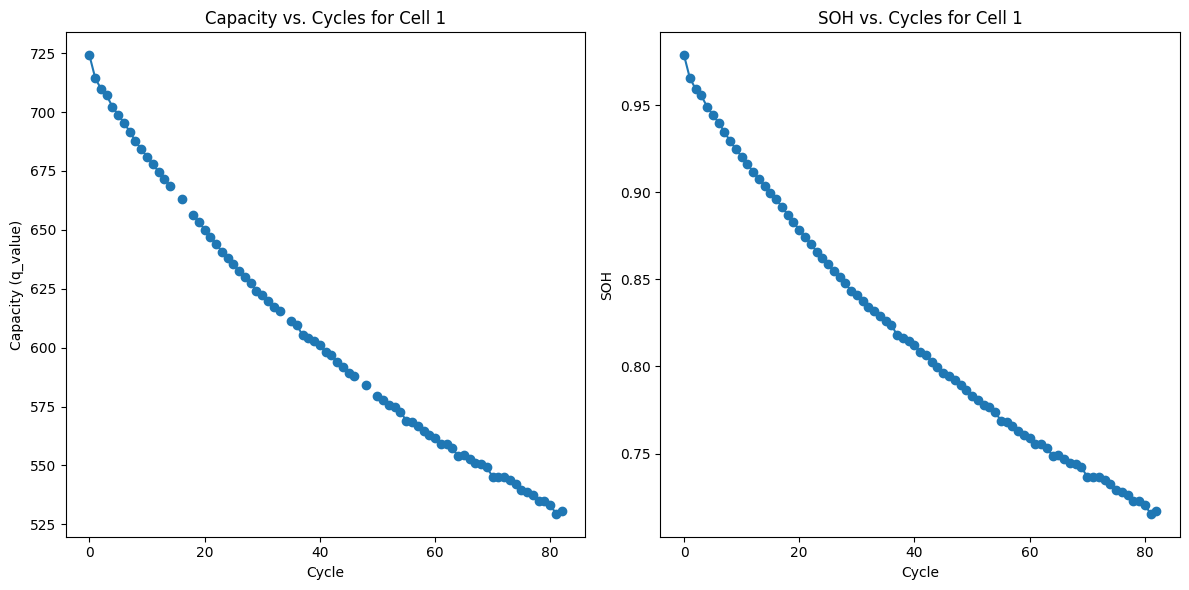

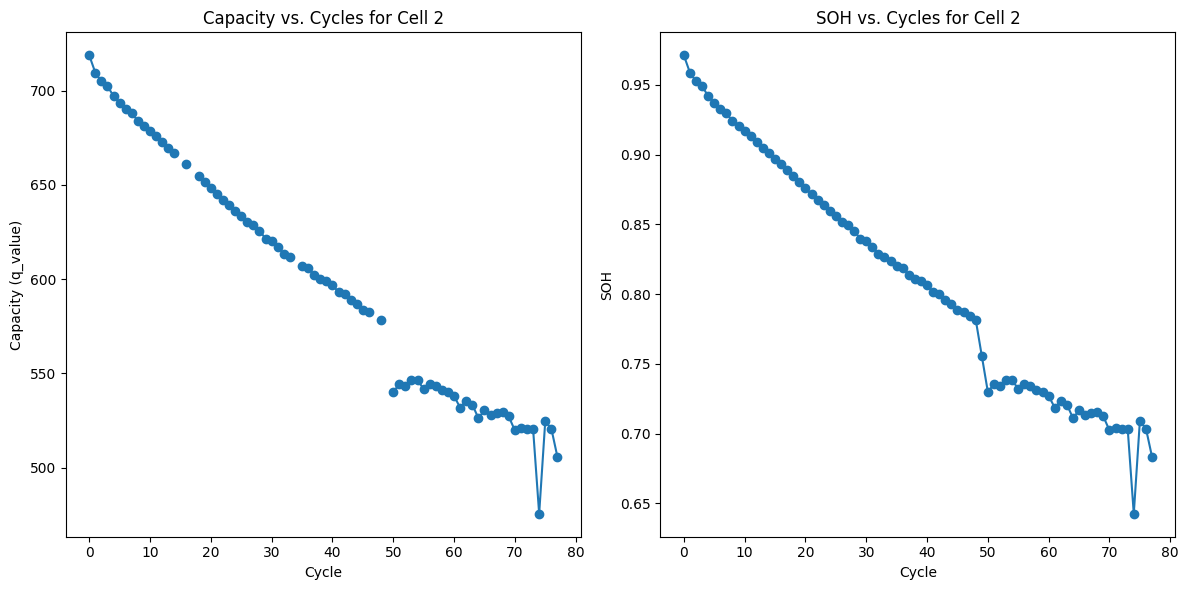

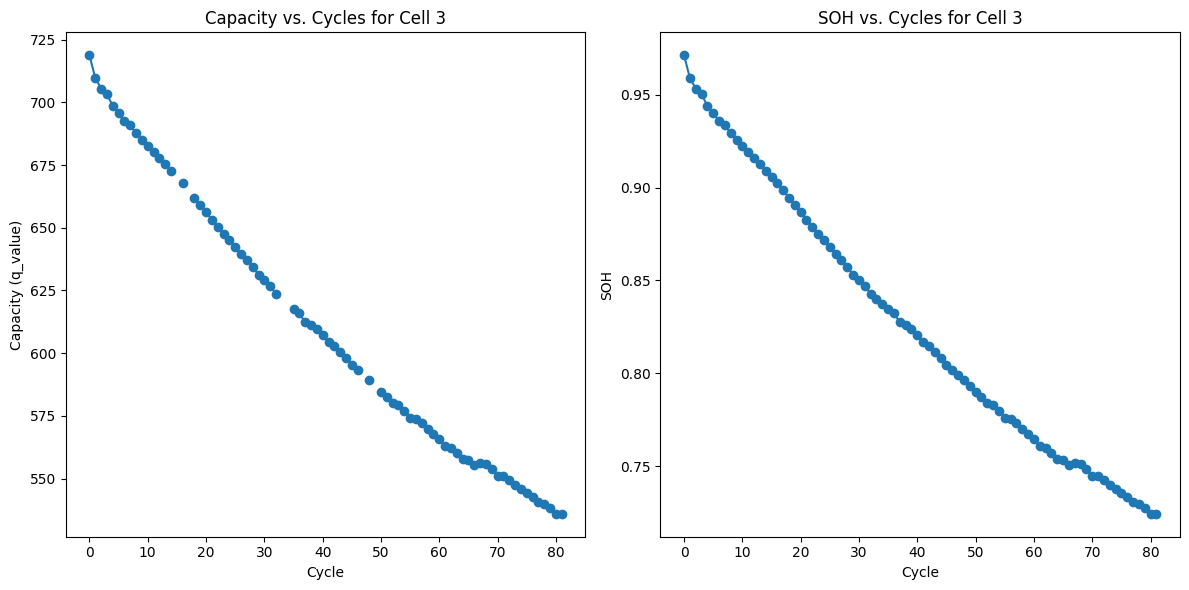

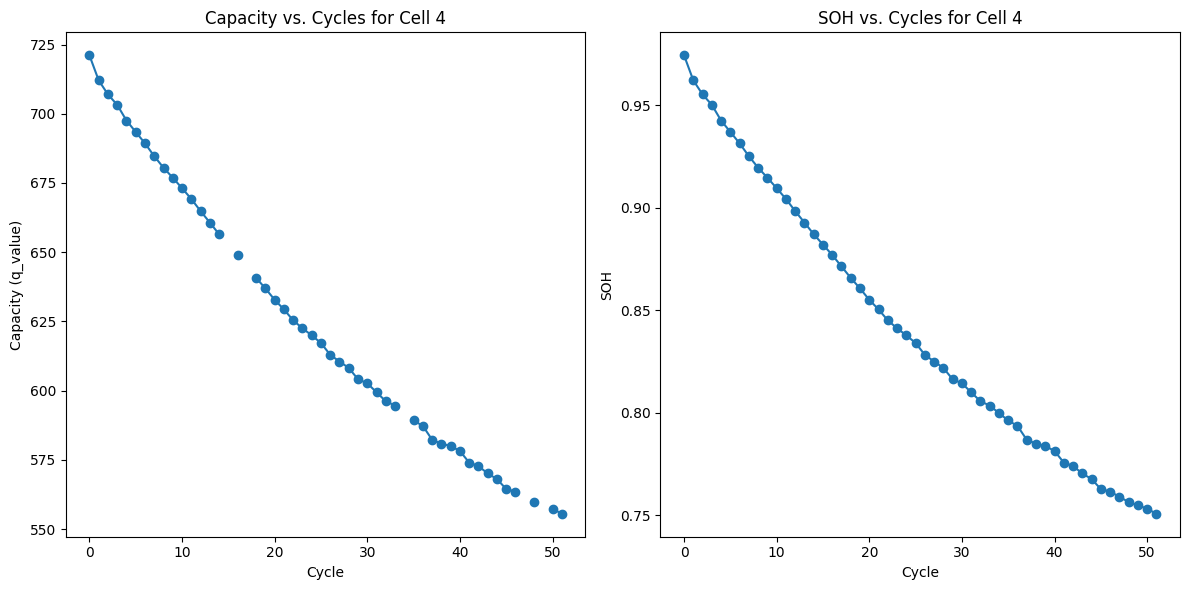

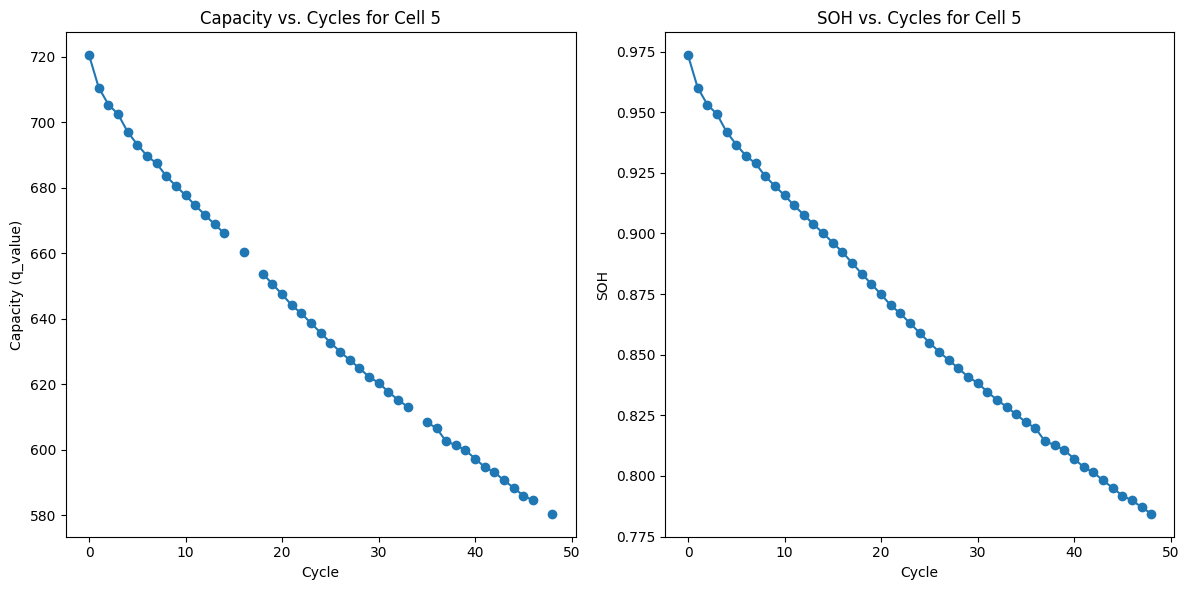

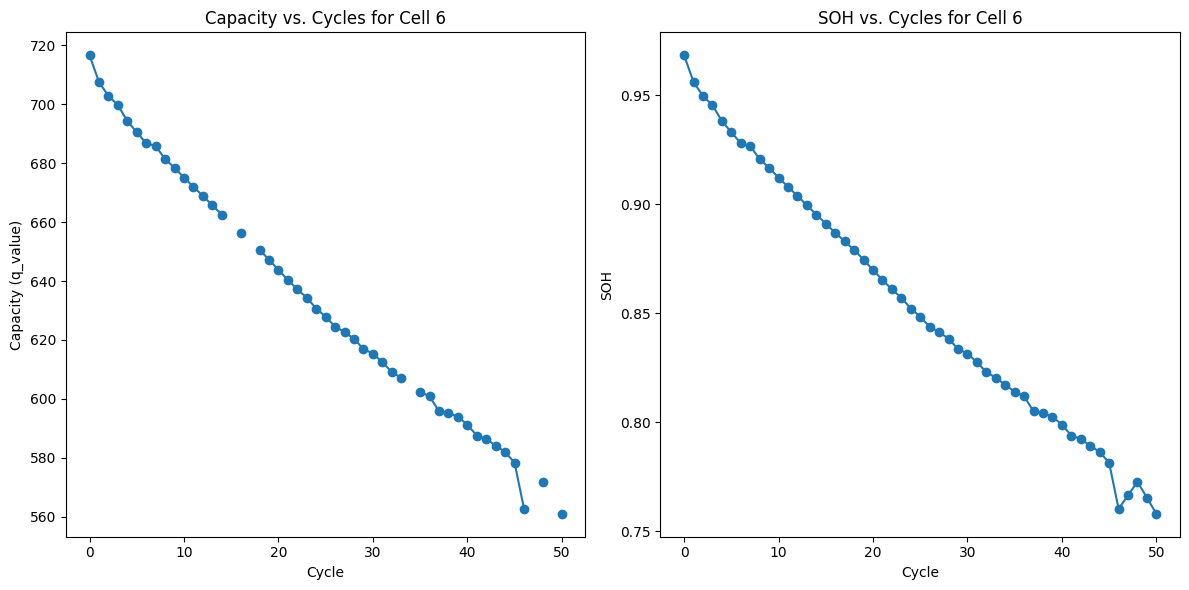

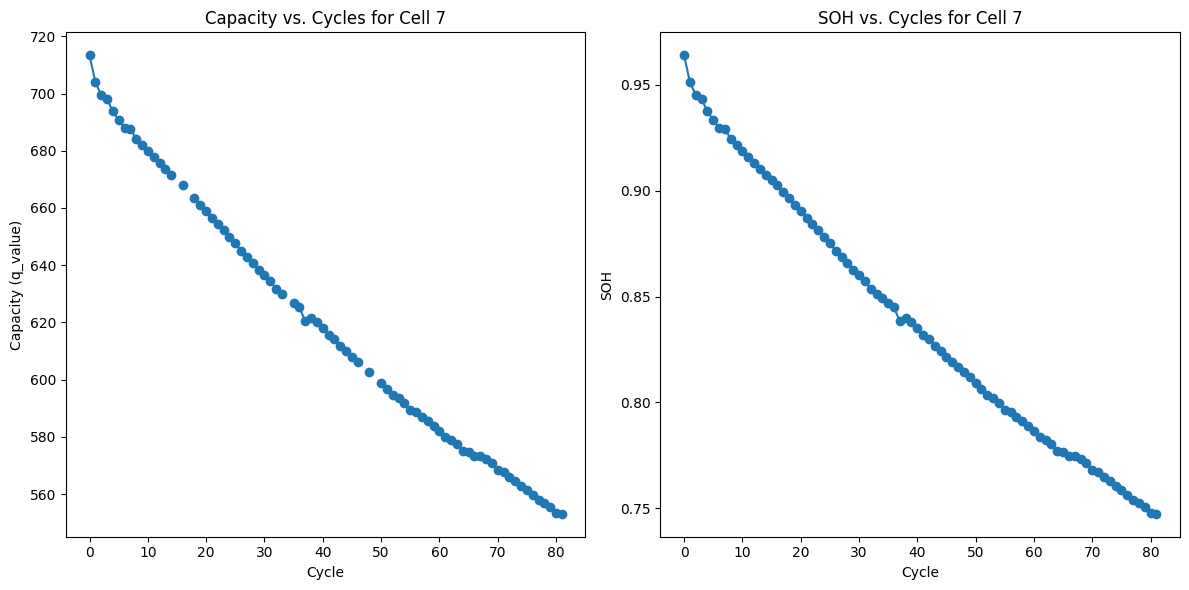

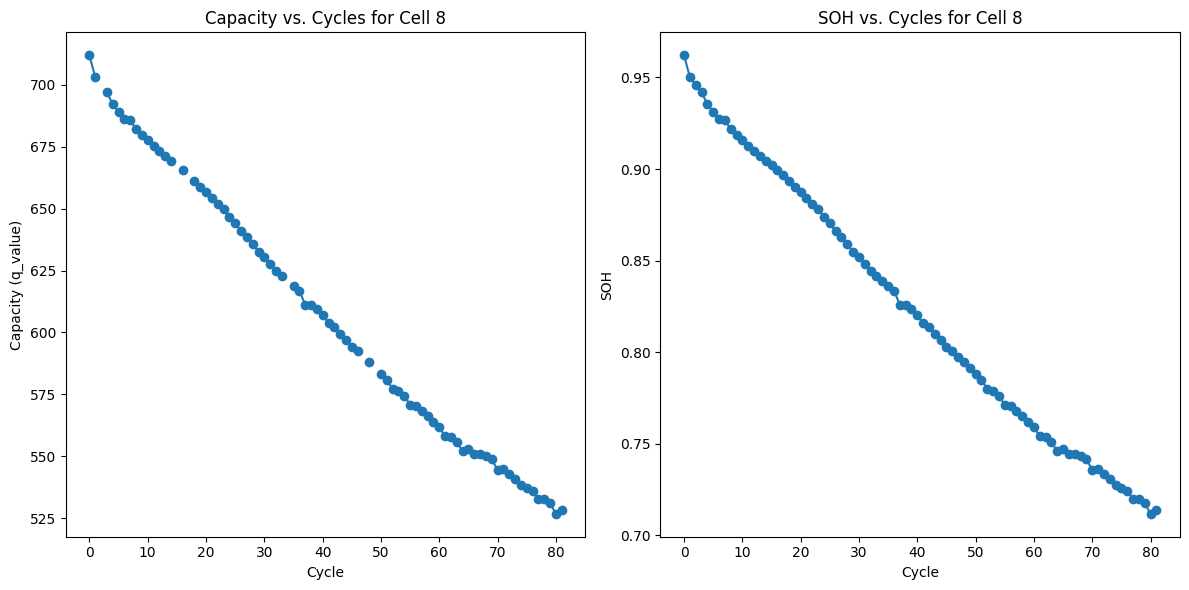

In [7]:
for i in range(0, 8):

    df_input = pd.DataFrame(input_data[i]).transpose()
    df_input = df_input.rename(columns={0: "cycle", 1: "q_value"})
    df_input['interpolate_time'] = df_input['q_value'].interpolate(option='time') #time interpolate preprocessing of cells 1 to 8
    df_input['soh'] = df_input['interpolate_time'] / 740
        # Plot capacity (q_value) vs. cycle
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(df_input['cycle'], df_input['q_value'], marker='o', linestyle='-')
    plt.xlabel('Cycle')
    plt.ylabel('Capacity (q_value)')
    plt.title(f'Capacity vs. Cycles for Cell {i+1}')

    # Plot SOH vs. cycles
    plt.subplot(1, 2, 2)
    plt.plot(df_input['cycle'], df_input['soh'], marker='o', linestyle='-')
    plt.xlabel('Cycle')
    plt.ylabel('SOH')
    plt.title(f'SOH vs. Cycles for Cell {i+1}')

    plt.tight_layout()
    plt.show()
    # print(df_input)
    df_input = df_input.drop("cycle", axis=1)
    df_input = df_input.drop("q_value", axis=1)
    df_input = df_input.drop("interpolate_time", axis=1)

    # normalisation
    sc = MinMaxScaler()
    label_sc = MinMaxScaler()
    data = sc.fit_transform(df_input.values)
    label_sc.fit(df_input.iloc[:, 0].values.reshape(-1, 1)) #MinMaxScaler preprocessing of cells 1 to 8

    # windowing of time series
    lookback = 10 #data windowing value
    inputs = np.zeros((len(data) - lookback, lookback, df_input.shape[1]))
    labels = np.zeros(len(data) - lookback)

    for j in range(lookback, len(data)):
        inputs[j - lookback] = data[j - lookback:j]
        labels[j - lookback] = data[j, 0]
    inputs = inputs.reshape(-1, lookback, df_input.shape[1])
    labels = labels.reshape(-1, 1)

    if (i < 4):
        if len(train_x) == 0:
            train_x = inputs[:]
            train_y = labels[:]
        else:
            train_x = np.concatenate((train_x, inputs[:]))
            train_y = np.concatenate((train_y, labels[:]))
    else:
        test_x[i - 4] = inputs
        test_y[i - 4] = labels

In [8]:
np.array(train_x).shape

(255, 10, 1)

In [9]:
print(train_x[0])

[[1.        ]
 [0.95075689]
 [0.92671186]
 [0.91225103]
 [0.88756713]
 [0.87015102]
 [0.85289598]
 [0.83341703]
 [0.8125442 ]
 [0.79517458]]


In [10]:
np.array(train_y).shape

(255, 1)

In [11]:
np.array(test_x[0]).shape # test_x = [[Cell5], [Cell6], [Cell7], [Cell8]]

(39, 10, 1)

In [12]:
np.array(test_y[0]).shape

(39, 1)

In [13]:
batch_size = 32
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [14]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [15]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__() 
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:, -1]))
        return out, h

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

In [16]:
class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x, h):
        out, h = self.lstm(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [17]:
def train(train_loader, learn_rate, hidden_dim=256, EPOCHS=100, model_type="GRU"):
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 2

    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)

    model.to(device)

    print("----------------------------------------")
    print("The", model_type, "has the layers as: ")
    print(model)
    print("----------------------------------------")

    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    # Start training loop
    for epoch in range(1, EPOCHS + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            if model_type == "GRU":
                h = h.data
            else:
                h = tuple([e.data for e in h])
            model.zero_grad()

            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()

            print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter,
                                                                                       len(train_loader),
                                                                                       avg_loss / counter))

        current_time = time.process_time()
        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss / len(train_loader)))
        print("Total Time Elapsed: {} seconds".format(str(current_time - start_time)))
        epoch_times.append(current_time - start_time)
    print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return model

In [18]:
import shap
print(shap.__version__)


0.45.0


c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    inp = torch.from_numpy(np.array(test_x))
    labs = torch.from_numpy(np.array(test_y))
    h = model.init_hidden(inp.shape[0])
    out, h = model(inp.to(device).float(), h)
    outputs.append(label_sc.inverse_transform(out.cpu().detach().numpy()).reshape(-1))
    targets.append(label_sc.inverse_transform(labs.numpy()).reshape(-1))

    print("Evaluation Time: {}".format(str(time.process_time() - start_time)))
    MAE = 0
    RMSE = 0
    for i in range(len(outputs)):
        MAE += np.mean(abs(outputs[i] - targets[i])) / len(outputs)
        RMSE += np.mean((outputs[i] - targets[i]) ** 2) / len(outputs)
    RMSE = math.sqrt(RMSE)
    print("MAE: {}".format(MAE))
    print("RMSE: {}".format(RMSE))
    return outputs, targets, MAE, RMSE

In [20]:
lr = 0.001
gru_model = train(train_loader, lr, model_type="GRU")
lstm_model = train(train_loader, lr, model_type="LSTM")

----------------------------------------
The GRU has the layers as: 
GRUNet(
  (gru): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
)
----------------------------------------
Starting Training of GRU model
Epoch 1......Step: 1/7....... Average Loss for Epoch: 0.14664584398269653
Epoch 1......Step: 2/7....... Average Loss for Epoch: 0.1364182084798813
Epoch 1......Step: 3/7....... Average Loss for Epoch: 0.1126234953602155
Epoch 1......Step: 4/7....... Average Loss for Epoch: 0.09809314645826817
Epoch 1......Step: 5/7....... Average Loss for Epoch: 0.08606047108769417
Epoch 1......Step: 6/7....... Average Loss for Epoch: 0.08177316126724084
Epoch 1......Step: 7/7....... Average Loss for Epoch: 0.07502672980938639
Epoch 1/100 Done, Total Loss: 0.07502672980938639
Total Time Elapsed: 0.515625 seconds
Epoch 2......Step: 1/7....... Average Loss for Epoch: 0.030324049293994904
Epoch 2......Step: 2/7.......

In [21]:
torch.save(gru_model.state_dict(), "./saved_models/gru_model.pt")
torch.save(lstm_model.state_dict(), "./saved_models/lstm_model.pt")

GRU Evaluation for Cell 5
Evaluation Time: 0.078125
MAE: 0.005948325421450264
RMSE: 0.006008747507517505


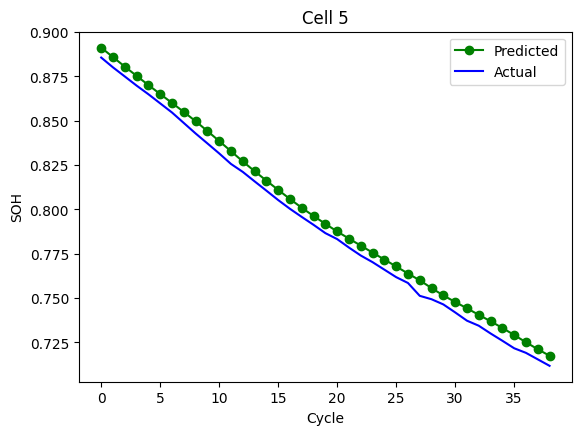

GRU Evaluation for Cell 6
Evaluation Time: 0.03125
MAE: 0.0055885619246397915
RMSE: 0.006990552562835002


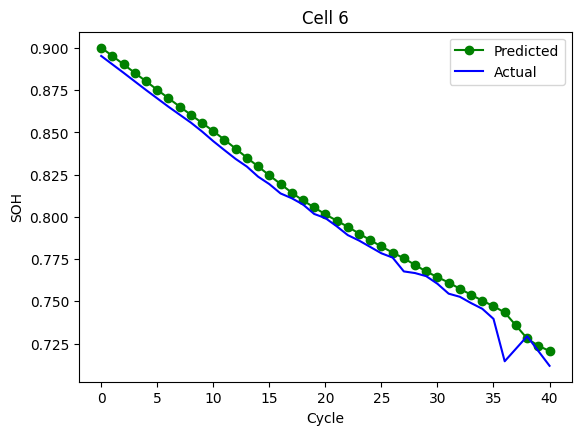

GRU Evaluation for Cell 7
Evaluation Time: 0.5
MAE: 0.001501980507687682
RMSE: 0.0017296898268559298


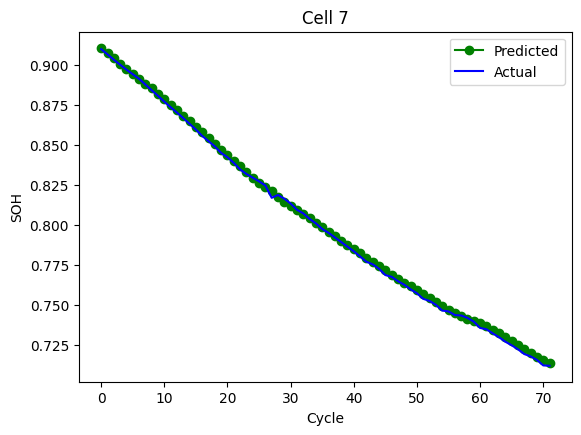

GRU Evaluation for Cell 8
Evaluation Time: 0.1875
MAE: 0.0015960733645407805
RMSE: 0.002008068290401716


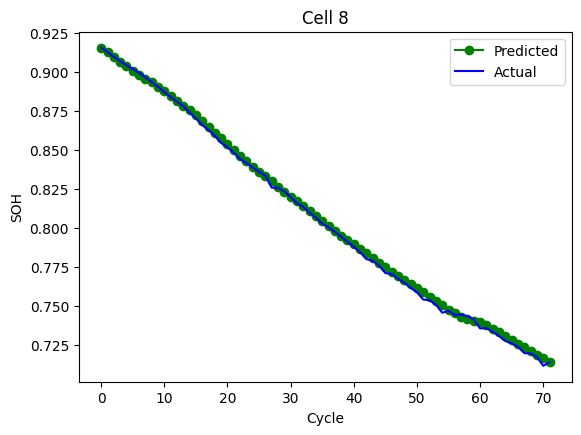

In [22]:
for i in range(0, 4): #plot both graphs
    print("GRU Evaluation for Cell {}".format(i + 5))
    gru_outputs, targets, gru_MAE, gru_RMSE = evaluate(gru_model, test_x[i], test_y[i], label_sc)
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, 1)
    plt.plot(gru_outputs[0][-100:], "-o", color="g", label="Predicted")
    plt.plot(targets[0][-100:], color="b", label="Actual")
    plt.xlabel('Cycle')
    plt.ylabel('SOH')
    plt.title("Cell {}".format(i + 5))
    plt.legend()
    plt.show()

# MAE and RMSE
# predicted curve
# performance, numerical results

LSTM Evaluation for Cell 5
Evaluation Time: 0.09375
MAE: 0.005978094120705009
RMSE: 0.006081227256008998


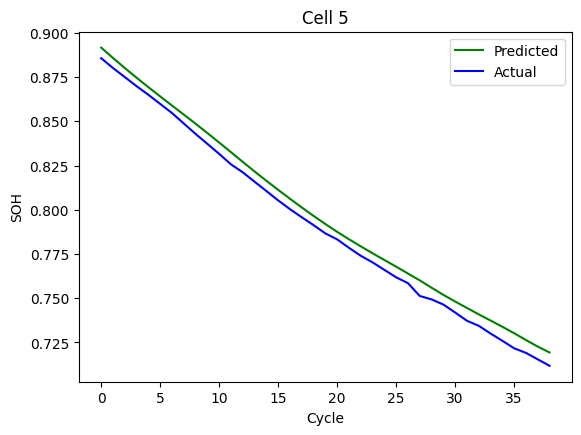

LSTM Evaluation for Cell 6
Evaluation Time: 0.015625
MAE: 0.005114531644369854
RMSE: 0.0067881375042003495


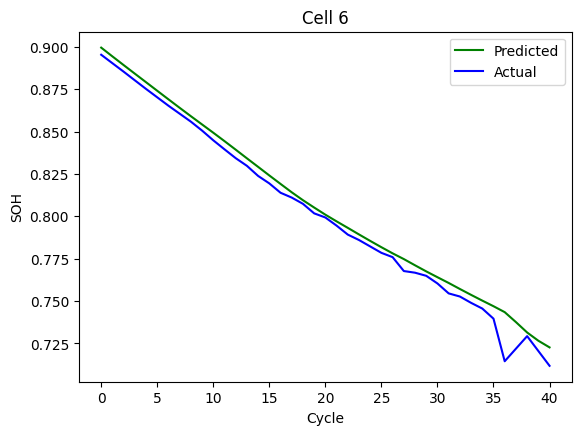

LSTM Evaluation for Cell 7
Evaluation Time: 0.03125
MAE: 0.001875518441671783
RMSE: 0.002204075853863633


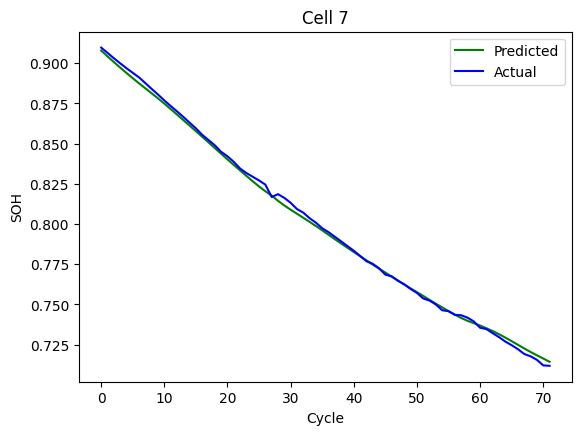

LSTM Evaluation for Cell 8
Evaluation Time: 0.015625
MAE: 0.0021647279678366337
RMSE: 0.0026050899779514703


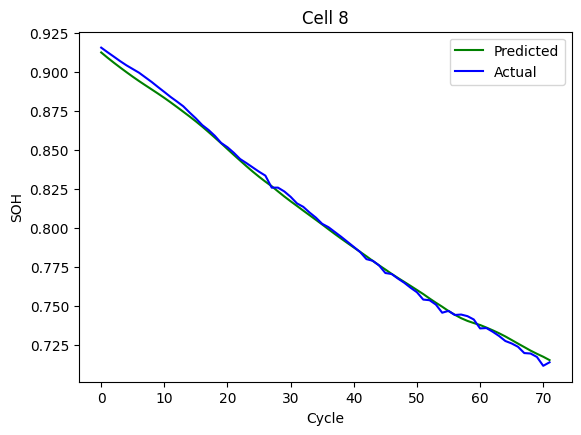

In [23]:
for i in range(0, 4):
    print("LSTM Evaluation for Cell {}".format(i + 5))
    lstm_outputs, targets, lstm_MAE, lstm_RMSE = evaluate(lstm_model, test_x[i], test_y[i], label_sc)
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, 1)
    plt.plot(lstm_outputs[0][-100:], "-", color="g", label="Predicted")
    plt.plot(targets[0][-100:], color="b", label="Actual")
    plt.xlabel('Cycle')
    plt.ylabel('SOH')
    plt.title("Cell {}".format(i + 5))
    plt.legend()
    plt.show()

# MAE and RMSE
# predicted curve
# performance, numerical results

In [24]:
print(type(train_x))


<class 'numpy.ndarray'>


C:\Users\manvi\AppData\Local\Temp\ipykernel_696\3887731553.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x.reshape(train_x.shape[0], -1), train_y)


(39, 10, 1)


C:\Users\manvi\AppData\Local\Temp\ipykernel_696\3887731553.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x.reshape(train_x.shape[0], -1), train_y)


(39, 10, 1)


C:\Users\manvi\AppData\Local\Temp\ipykernel_696\3887731553.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x.reshape(train_x.shape[0], -1), train_y)


(39, 10, 1)


C:\Users\manvi\AppData\Local\Temp\ipykernel_696\3887731553.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x.reshape(train_x.shape[0], -1), train_y)


(39, 10, 1)
Cell 5 - Random Forest MAE: 0.011914725279776382, RMSE: 0.012750523052995032
Cell 5 - SVR MAE: 0.02223288582055461, RMSE: 0.0275793174154513
Cell 6 - Random Forest MAE: 0.013282630682208016, RMSE: 0.021189671635520064
Cell 6 - SVR MAE: 0.031830257764951526, RMSE: 0.034982792796947444
Cell 7 - Random Forest MAE: 0.004426680363875959, RMSE: 0.00553726616213712
Cell 7 - SVR MAE: 0.0571017302972765, RMSE: 0.059628724015138024
Cell 8 - Random Forest MAE: 0.004795648834373265, RMSE: 0.0060036354086601285
Cell 8 - SVR MAE: 0.056848774370158575, RMSE: 0.059600996298823476
Variable Importance Plot - Global Interpretation


c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataC

IndexError: list index out of range

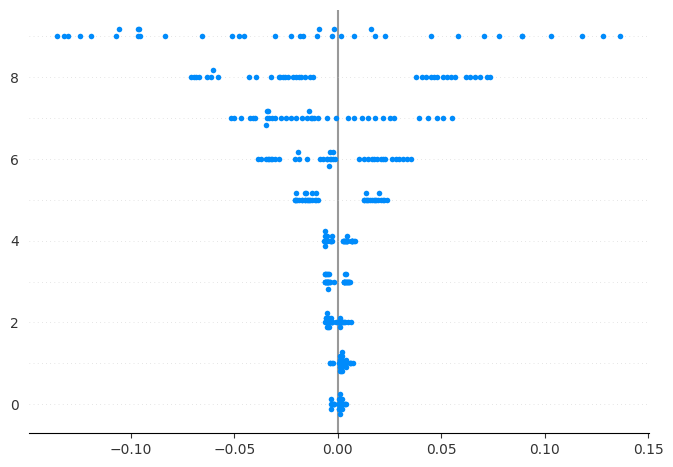

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()


# Function to train and evaluate Random Forest for multiple cells
def train_evaluate_random_forest_multi(train_x, train_y, test_x_list, test_y_list):
    rf_predictions_list = []
    rf_mae_list = []
    rf_rmse_list = []
    shap_values_list = []
    
    for i in range(len(test_x_list)):
        model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
        # Create the explainer

        model_rf.fit(train_x.reshape(train_x.shape[0], -1), train_y)
        rf_predictions = model_rf.predict(test_x_list[i].reshape(test_x_list[i].shape[0], -1))
        rf_mae = mean_absolute_error(test_y_list[i], rf_predictions)
        rf_rmse = mean_squared_error(test_y_list[i], rf_predictions, squared=False)
        explainer = shap.TreeExplainer(model_rf)

        shap_values = explainer.shap_values(test_x_list[i].reshape(test_x_list[i].shape[0], -1))
        print(test_x[0].shape)
        rf_predictions_list.append(rf_predictions)
        rf_mae_list.append(rf_mae)
        rf_rmse_list.append(rf_rmse)
        shap_values_list.append(shap_values)
    
    return rf_predictions_list, rf_mae_list, rf_rmse_list, shap_values_list

# Function to train and evaluate SVR for multiple cells
def train_evaluate_svr_multi(train_x, train_y, test_x_list, test_y_list):
    svr_predictions_list = []
    svr_mae_list = []
    svr_rmse_list = []
    
    for i in range(len(test_x_list)):
        model_svr = SVR(kernel='rbf')
        model_svr.fit(train_x.reshape(train_x.shape[0], -1), train_y)
        svr_predictions = model_svr.predict(test_x_list[i].reshape(test_x_list[i].shape[0], -1))
        svr_mae = mean_absolute_error(test_y_list[i], svr_predictions)
        svr_rmse = mean_squared_error(test_y_list[i], svr_predictions, squared=False)
        
        svr_predictions_list.append(svr_predictions)
        svr_mae_list.append(svr_mae)
        svr_rmse_list.append(svr_rmse)
    
    return svr_predictions_list, svr_mae_list, svr_rmse_list

# Train and evaluate Random Forest for multiple cells
rf_predictions_list, rf_mae_list, rf_rmse_list, shap_values_list = train_evaluate_random_forest_multi(train_x, train_y, test_x[:4], test_y[:4])

# Train and evaluate SVR for multiple cells
svr_predictions_list, svr_mae_list, svr_rmse_list = train_evaluate_svr_multi(train_x, train_y, test_x[:4], test_y[:4])

# Print MAE and RMSE for each cell
for i in range(4):
    print(f"Cell {i+5} - Random Forest MAE: {rf_mae_list[i]}, RMSE: {rf_rmse_list[i]}")
    print(f"Cell {i+5} - SVR MAE: {svr_mae_list[i]}, RMSE: {svr_rmse_list[i]}")

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values_list[0], test_x)


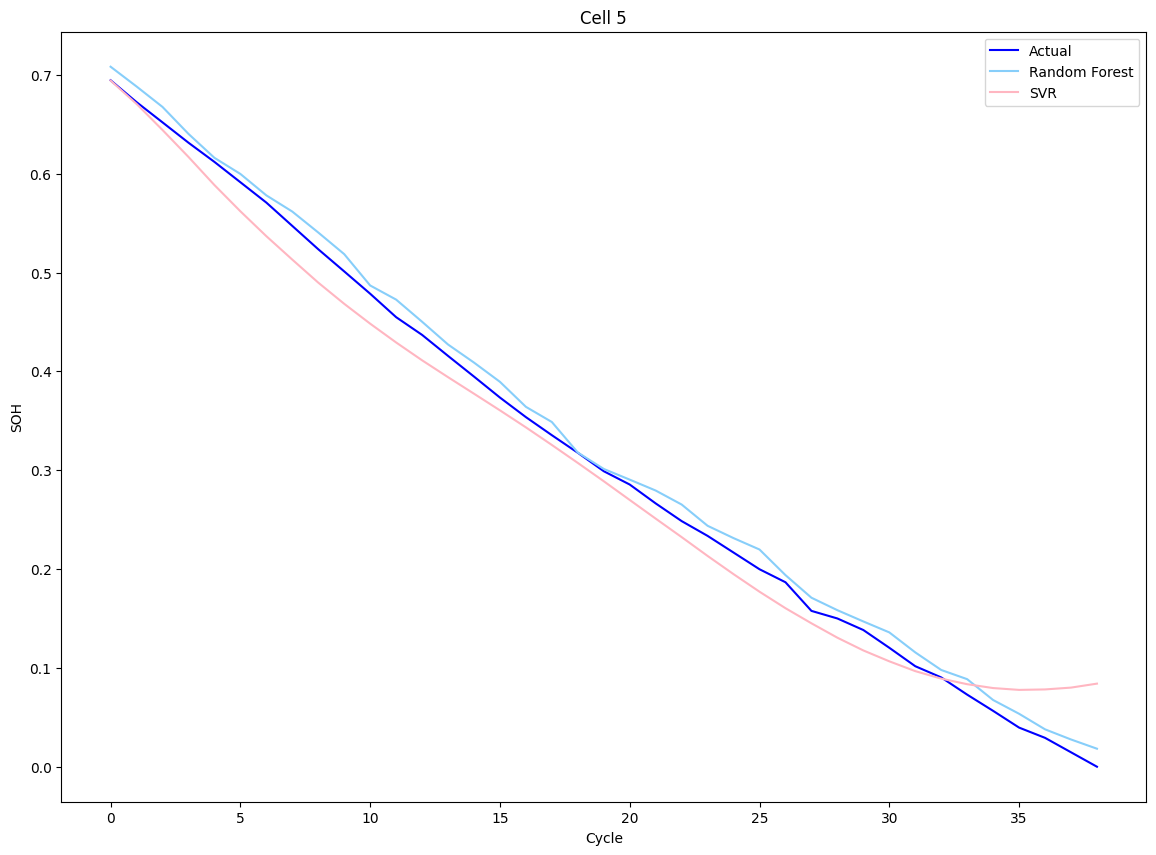

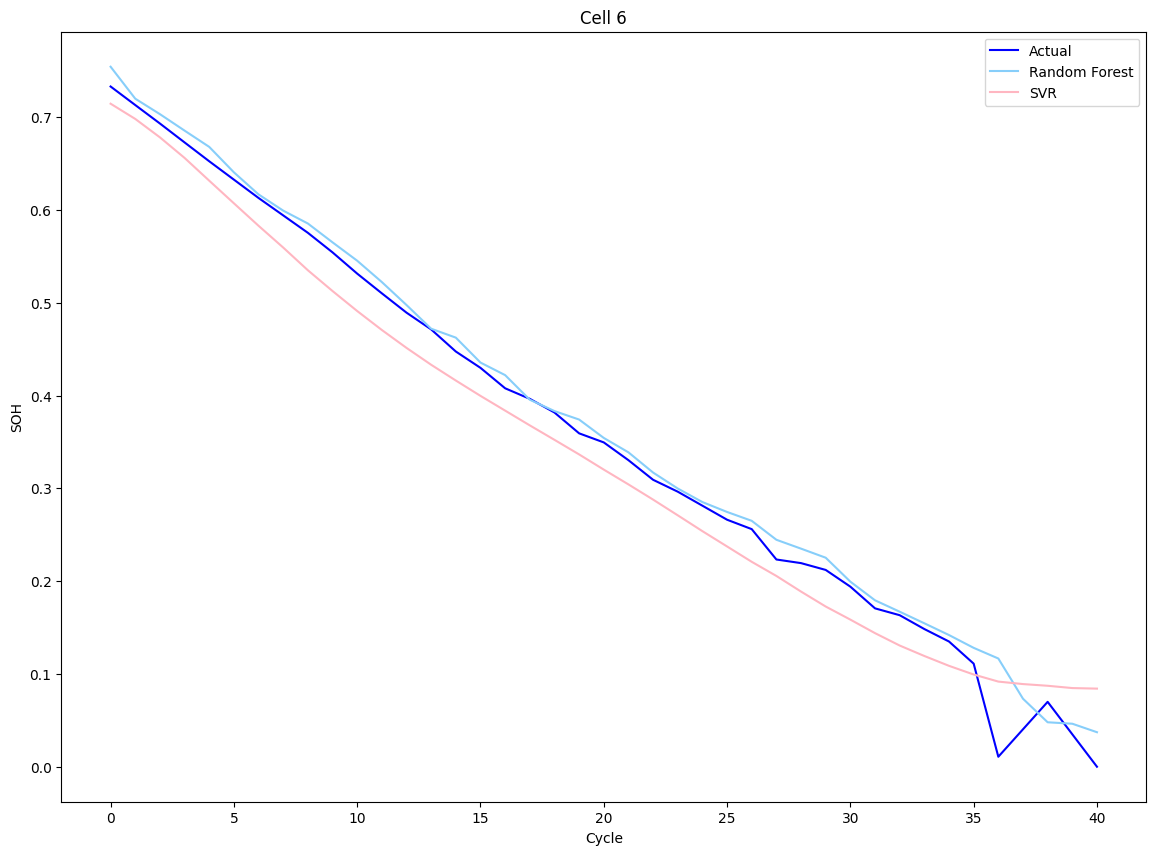

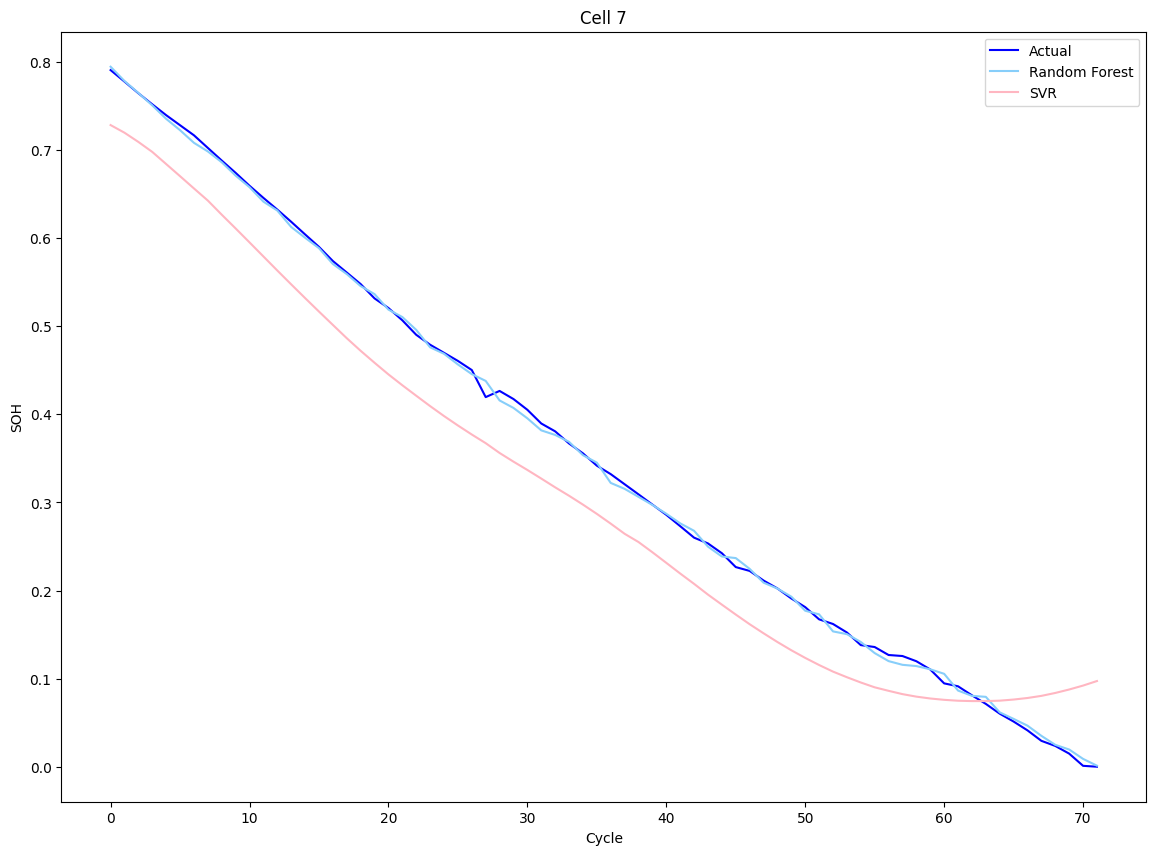

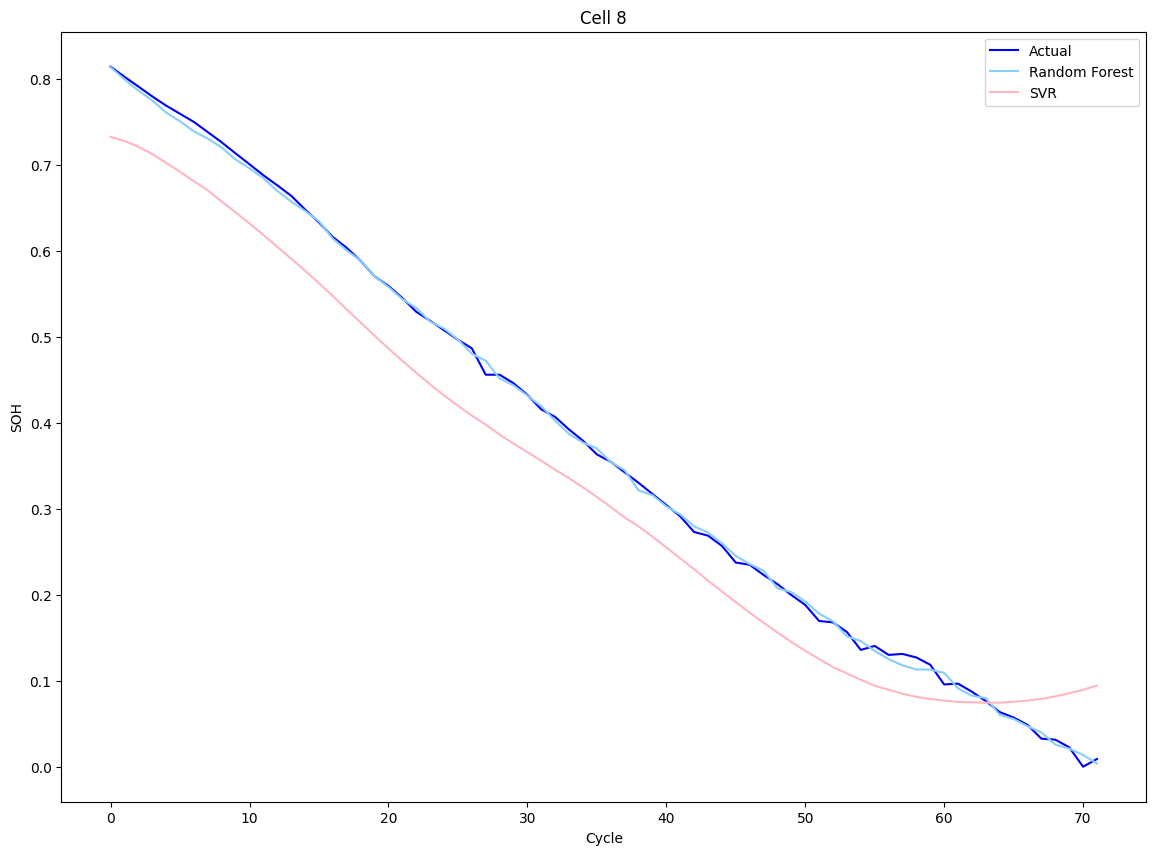

In [ ]:
# for i in range(4):
#     plt.figure(figsize=(14, 10))
#     plt.plot(test_y[i][-100:], "-", color="blue", label="Actual")
#     plt.plot(rf_predictions_list[i][-100:], "-", color="lightskyblue", label="Random Forest")
    
#     plt.plot(svr_predictions_list[i][-100:], "-", color="lightpink", label="SVR")
    
#     plt.xlabel('Cycle')
#     plt.ylabel('SOH')
#     plt.title("Cell {}".format(i + 5))
#     plt.legend()
#     plt.show()


Evaluation Time: 0.0
MAE: 0.004571452013841841
RMSE: 0.004646152960988478
Evaluation Time: 0.015625
MAE: 0.004272478172296932
RMSE: 0.004402156933598605


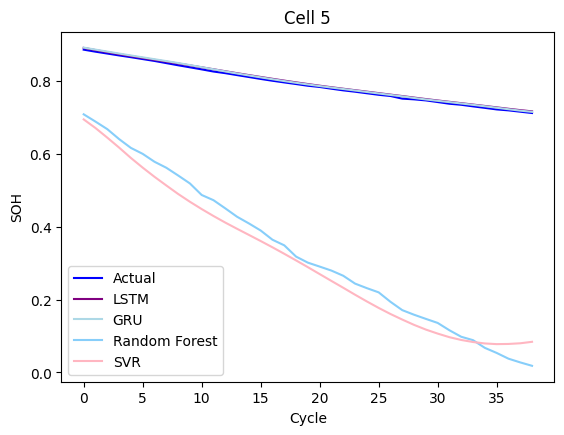

Evaluation Time: 0.0
MAE: 0.003729375298577631
RMSE: 0.005648584247552828
Evaluation Time: 0.0
MAE: 0.0042319834699010815
RMSE: 0.005840305668056157


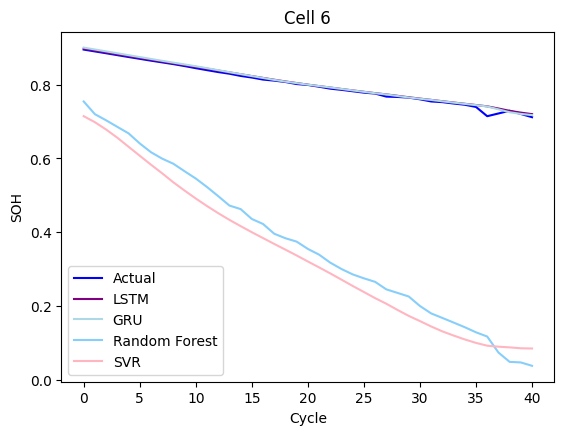

Evaluation Time: 0.015625
MAE: 0.0029652199090963896
RMSE: 0.003350505757320291
Evaluation Time: 0.03125
MAE: 0.0010915593230146948
RMSE: 0.0013229224663817245


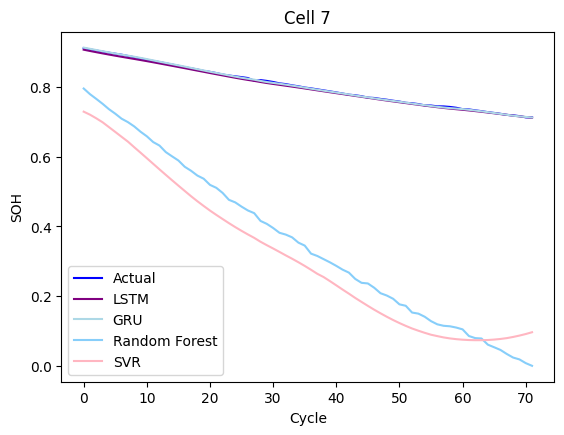

Evaluation Time: 0.0
MAE: 0.0031678570287401206
RMSE: 0.0037666773679503806
Evaluation Time: 0.0
MAE: 0.001075050773581224
RMSE: 0.0014047698974354978


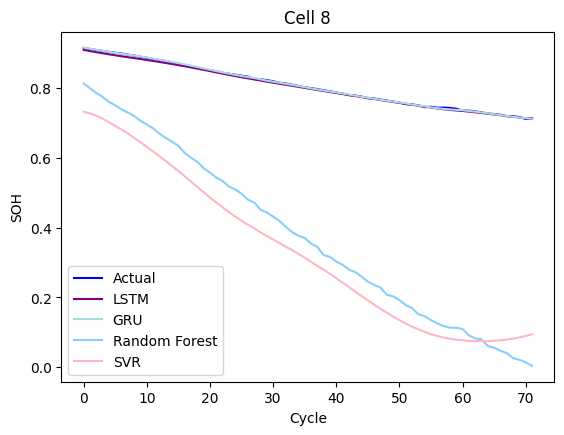

In [ ]:
for i in range(4):
    plt.figure(figsize=(14, 10))
    lstm_outputs, targets, lstm_MAE, lstm_RMSE = evaluate(lstm_model, test_x[i], test_y[i], label_sc)
    gru_outputs, targets, gru_MAE, gru_RMSE = evaluate(gru_model, test_x[i], test_y[i], label_sc)
    plt.subplot(2, 2, 1)
    plt.plot(targets[0][-100:], color="b", label="Actual")
    plt.plot(lstm_outputs[0][-100:], "-", color="purple", label="LSTM")
    plt.plot(gru_outputs[0][-100:], "-", color="lightblue", label="GRU")
    plt.plot(rf_predictions_list[i][-100:], "-", color="lightskyblue", label="Random Forest")
    plt.plot(svr_predictions_list[i][-100:], "-", color="lightpink", label="SVR")
    
    plt.xlabel('Cycle')
    plt.ylabel('SOH')
    plt.title("Cell {}".format(i + 5))
    plt.legend()
    plt.show()
